# Comparing Parthenope and Federico II’s Facebook pages during the latest Academic Year

#### Reference https://datascienceplus.com/comparing-trump-and-clintons-facebook-pages-during-the-us-presidential-election-2016/

The first thing to do is to generate an access token from Facebook’s developer portal. 
https://developers.facebook.com/tools/explorer
Keep it anonymous (otherwise you’re gifting the world access to your account) 
and save it in your environment.


In [1]:
#install.packages('Rfacebook')

library(Rfacebook)
options(scipen = 999)
token <- "EAACEdEose0cBAHqlsZAB5Kbomu6vloEZBxTTA9nvDZCWOZA2c3LDD9bxbS90TjIcjQxihb6YElT303l7fMnY6ZCafwHUgfrghodvU3QAAI99j8G1mAjozXSMJQCVPs1zHgWaUZBcaM5w4cenMs3JzdLnpWNS4oGVXrV2jLyu3kt2g7dK9eK6rLRRXnkmKCltFRW6TuASafAQZDZD"



Loading required package: httr
Loading required package: rjson
Loading required package: httpuv
Warning message:
“package ‘httpuv’ was built under R version 3.4.1”
Attaching package: ‘Rfacebook’

The following object is masked from ‘package:methods’:

    getGroup



In [47]:
Parthenope <- getPage("Parthenope", token, n = 5000, since='2016/10/01', until='2017/09/01')


25 posts 50 posts 75 posts 100 posts 125 posts 150 posts 175 posts 200 posts 225 posts 250 posts 275 posts 300 posts 325 posts 332 posts 

In [48]:
#unina.it
unina <- getPage("unina.it", token, n = 5000, since='2016/10/01', until='2017/09/01')


25 posts 50 posts 75 posts 100 posts 125 posts 150 posts 175 posts 200 posts 225 posts 250 posts 275 posts 300 posts 325 posts 350 posts 375 posts 400 posts 425 posts 450 posts 475 posts 500 posts 525 posts 550 posts 575 posts 600 posts 609 posts 

In [5]:
format.facebook.date <- function(datestring) {
  date <- as.POSIXct(datestring, format = "%Y-%m-%dT%H:%M:%S+0000", tz = "GMT")
}

aggregate.metric <- function(metric) {
  m <- aggregate(page[[paste0(metric, "_count")]], list(month = page$month),
                 mean)
  m$month <- as.Date(paste0(m$month, "-15"))
  m$metric <- metric
  return(m)
}


# Comparing Partenope and Federico II’s Facebook pages latest years
# Any conclusion?

In [49]:
#parthenope
page <- Parthenope
page$datetime <- format.facebook.date(page$created_time)
page$month <- format(page$datetime, "%Y-%m")
df.list <- lapply(c("likes", "comments", "shares"), aggregate.metric)
Parthenope_months <- do.call(rbind, df.list)

#unina
page <- unina
page$datetime <- format.facebook.date(page$created_time)
page$month <- format(page$datetime, "%Y-%m")
df.list <- lapply(c("likes", "comments", "shares"), aggregate.metric)
unina_months <- do.call(rbind, df.list)



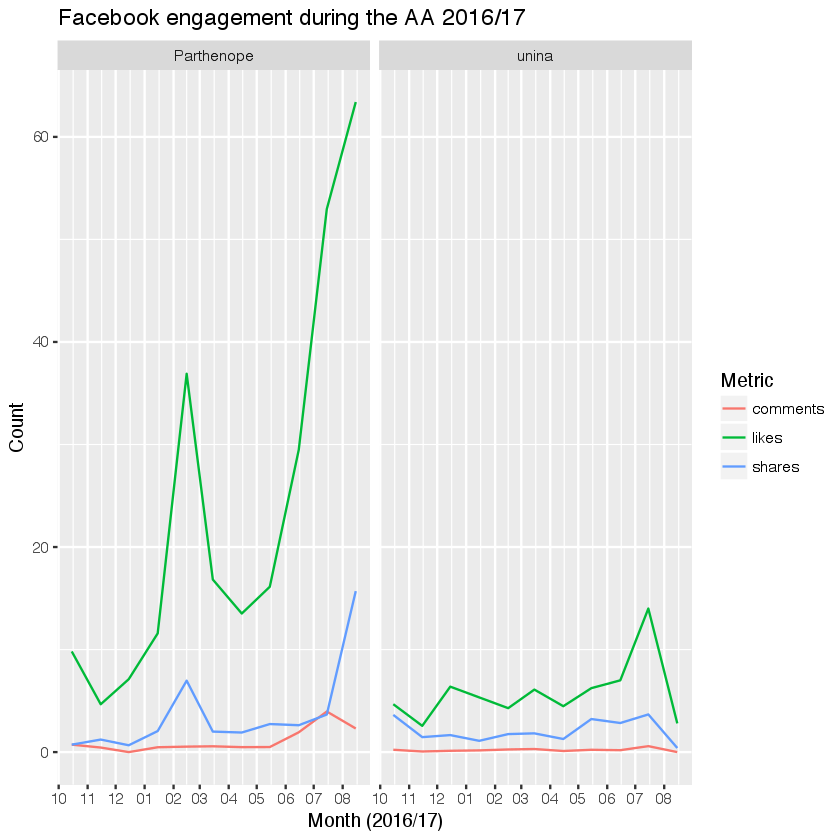

In [50]:
unina_months$university <- "unina"
Parthenope_months$university <- "Parthenope"
both <- rbind(unina_months, Parthenope_months)

library(ggplot2)
#install.packages('scales')
library(scales)

p <- ggplot(both, aes(x = month, y = x, group = metric)) + geom_line(aes(color = metric)) +
  scale_x_date(date_breaks = "months", labels = date_format("%m")) + ggtitle("Facebook engagement during the AA 2016/17") + labs(y = "Count", x = "Month (2016/17)", aesthetic='Metric')  + scale_colour_discrete(name = "Metric")

#add in a facet
p <- p + facet_grid(. ~ university)
p

## Let's vary the observation period

15 posts 25 posts 50 posts 75 posts 100 posts 125 posts 150 posts 175 posts 200 posts 225 posts 250 posts 275 posts 300 posts 325 posts 350 posts 375 posts 400 posts 425 posts 450 posts 475 posts 500 posts 525 posts 550 posts 575 posts 600 posts 617 posts 

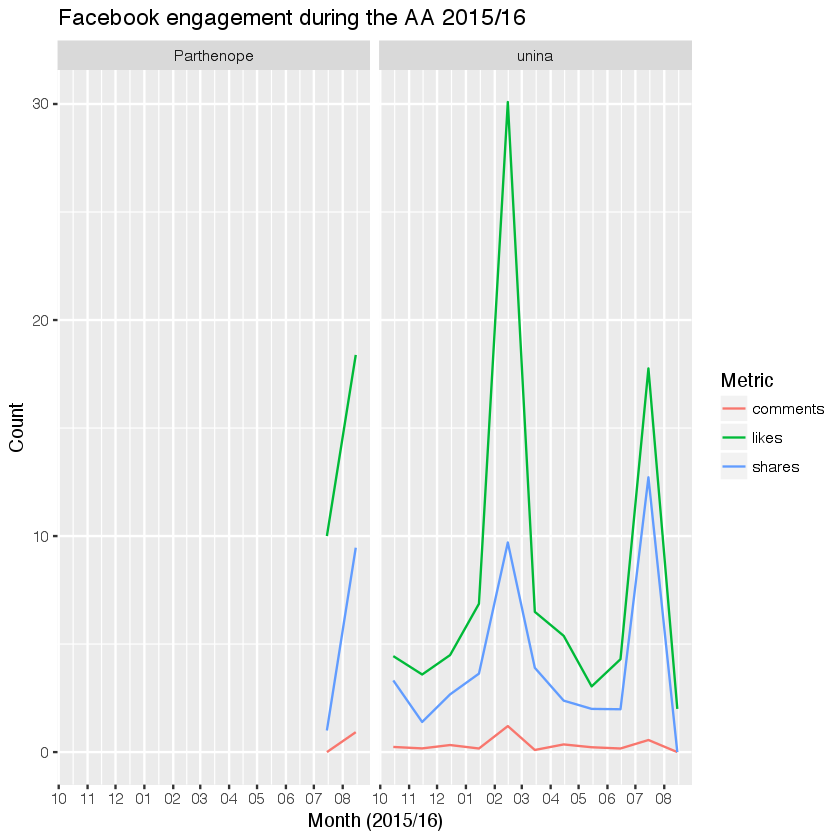

In [52]:
Parthenope <- getPage("Parthenope", token, n = 5000, since='2015/10/01', until='2016/09/01')
unina <- getPage("unina.it", token, n = 5000, since='2015/10/01', until='2016/09/01')


#parthenope
page <- Parthenope
page$datetime <- format.facebook.date(page$created_time)
page$month <- format(page$datetime, "%Y-%m")
df.list <- lapply(c("likes", "comments", "shares"), aggregate.metric)
Parthenope_months <- do.call(rbind, df.list)

#unina
page <- unina
page$datetime <- format.facebook.date(page$created_time)
page$month <- format(page$datetime, "%Y-%m")
df.list <- lapply(c("likes", "comments", "shares"), aggregate.metric)
unina_months <- do.call(rbind, df.list)

unina_months$university <- "unina"
Parthenope_months$university <- "Parthenope"
both <- rbind(unina_months, Parthenope_months)

library(ggplot2)
#install.packages('scales')
library(scales)

p <- ggplot(both, aes(x = month, y = x, group = metric)) + geom_line(aes(color = metric)) +
  scale_x_date(date_breaks = "months", labels = date_format("%m")) + ggtitle("Facebook engagement during the AA 2015/16") + labs(y = "Count", x = "Month (2015/16)", aesthetic='Metric')  + scale_colour_discrete(name = "Metric")

#add in a facet
p <- p + facet_grid(. ~ university)
p

In [53]:
both


month,x,metric,university
2015-10-15,4.44318182,likes,unina
2015-11-15,3.59210526,likes,unina
2015-12-15,4.49090909,likes,unina
2016-01-15,6.86666667,likes,unina
2016-02-15,30.09090909,likes,unina
2016-03-15,6.49180328,likes,unina
2016-04-15,5.38157895,likes,unina
2016-05-15,3.04081633,likes,unina
2016-06-15,4.30000000,likes,unina
2016-07-15,17.76000000,likes,unina


25 posts 50 posts 75 posts 100 posts 125 posts 150 posts 175 posts 200 posts 225 posts 250 posts 275 posts 300 posts 325 posts 350 posts 375 posts 400 posts 425 posts 450 posts 475 posts 500 posts 525 posts 550 posts 575 posts 584 posts 25 posts 50 posts 75 posts 100 posts 125 posts 150 posts 175 posts 200 posts 225 posts 250 posts 275 posts 300 posts 325 posts 350 posts 375 posts 400 posts 425 posts 450 posts 475 posts 500 posts 525 posts 550 posts 575 posts 600 posts 625 posts 650 posts 675 posts 700 posts 725 posts 750 posts 775 posts 800 posts 825 posts 850 posts 875 posts 900 posts 925 posts 950 posts 975 posts 1000 posts 1025 posts 1050 posts 1075 posts 1100 posts 1125 posts 1150 posts 1175 posts 1200 posts 1225 posts 1250 posts 1275 posts 1300 posts 1325 posts 1350 posts 1375 posts 1400 posts 1425 posts 1450 posts 1475 posts 1500 posts 1525 posts 1550 posts 1570 posts 

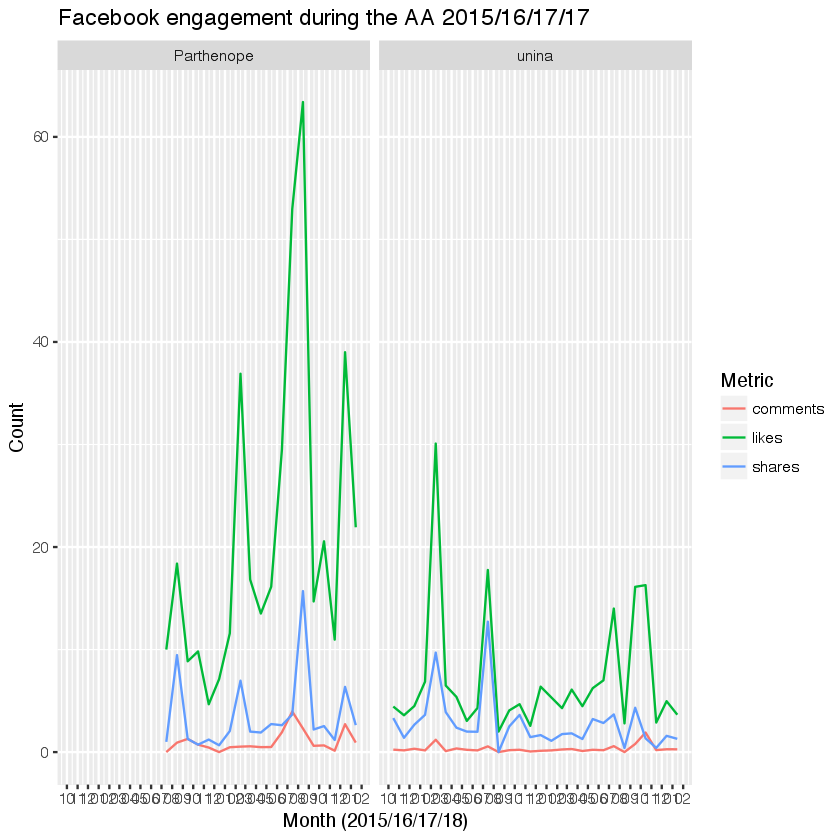

In [54]:
Parthenope <- getPage("Parthenope", token, n = 5000, since='2015/10/01', until='2018/02/01')
unina <- getPage("unina.it", token, n = 5000, since='2015/10/01', until='2018/02/01')


#parthenope
page <- Parthenope
page$datetime <- format.facebook.date(page$created_time)
page$month <- format(page$datetime, "%Y-%m")
df.list <- lapply(c("likes", "comments", "shares"), aggregate.metric)
Parthenope_months <- do.call(rbind, df.list)

#unina
page <- unina
page$datetime <- format.facebook.date(page$created_time)
page$month <- format(page$datetime, "%Y-%m")
df.list <- lapply(c("likes", "comments", "shares"), aggregate.metric)
unina_months <- do.call(rbind, df.list)

unina_months$university <- "unina"
Parthenope_months$university <- "Parthenope"
both <- rbind(unina_months, Parthenope_months)

library(ggplot2)
#install.packages('scales')
library(scales)

p <- ggplot(both, aes(x = month, y = x, group = metric)) + geom_line(aes(color = metric)) +
  scale_x_date(date_breaks = "months", labels = date_format("%m")) + ggtitle("Facebook engagement during the AA 2015/16/17/17") + labs(y = "Count", x = "Month (2015/16/17/18)", aesthetic='Metric')  + scale_colour_discrete(name = "Metric")

#add in a facet
p <- p + facet_grid(. ~ university)
p

## Comparing airports of Naples and Venice public engagements 

In [15]:
aeroportona <- getPage("aeroportonapoli", token, n = 5000, since='2017/01/01', until='2018/02/01')
aeroportove <- getPage("veniceairport", token, n = 5000, since='2017/01/01', until='2018/02/01')




25 posts 50 posts 75 posts 100 posts 125 posts 150 posts 175 posts 200 posts 225 posts 250 posts 275 posts 287 posts 25 posts 50 posts 75 posts 100 posts 125 posts 150 posts 175 posts 200 posts 225 posts 250 posts 275 posts 300 posts 325 posts 350 posts 375 posts 400 posts 425 posts 448 posts 

In [16]:
#parthenope
page <- aeroportona
page$datetime <- format.facebook.date(page$created_time)
page$month <- format(page$datetime, "%Y-%m")
df.list <- lapply(c("likes", "comments", "shares"), aggregate.metric)
aeroportona_months <- do.call(rbind, df.list)

#unina
page <- aeroportove
page$datetime <- format.facebook.date(page$created_time)
page$month <- format(page$datetime, "%Y-%m")
df.list <- lapply(c("likes", "comments", "shares"), aggregate.metric)
aeroportove_months <- do.call(rbind, df.list)



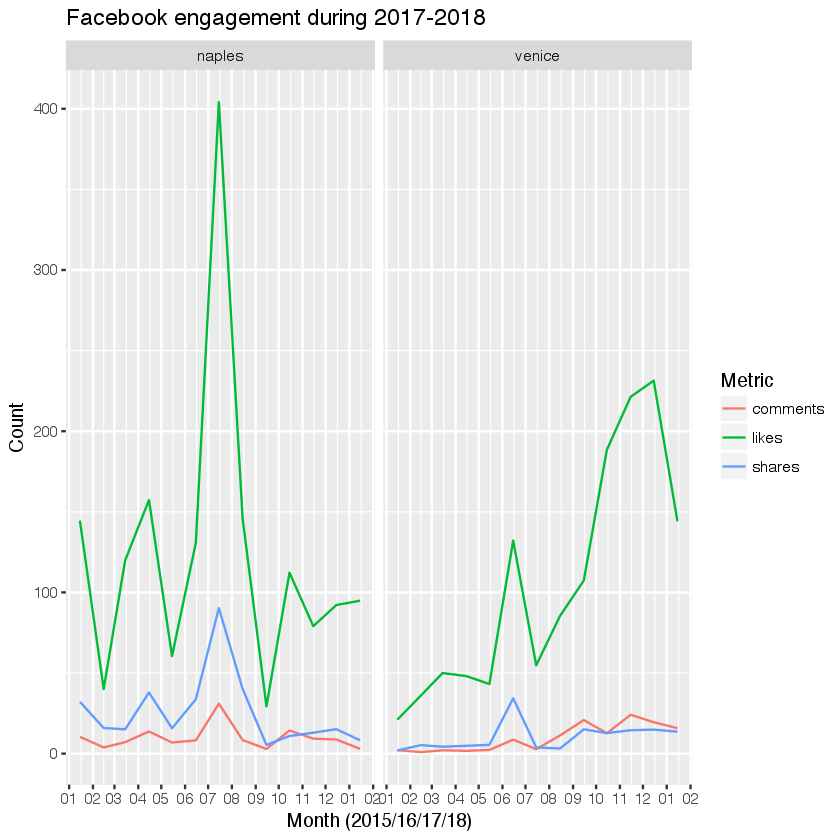

In [17]:
aeroportona_months$city <- "naples"
aeroportove_months$city <- "venice"
both <- rbind(aeroportona_months, aeroportove_months)

library(ggplot2)
#install.packages('scales')
library(scales)

p <- ggplot(both, aes(x = month, y = x, group = metric)) + geom_line(aes(color = metric)) +
  scale_x_date(date_breaks = "months", labels = date_format("%m")) + ggtitle("Facebook engagement during 2017-2018") + labs(y = "Count", x = "Month (2015/16/17/18)", aesthetic='Metric')  + scale_colour_discrete(name = "Metric")

#add in a facet
p <- p + facet_grid(. ~ city)
p